# Regularize regression house analyisis

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb

In [2]:
house=pd.read_csv('E:/DSS/gilthub projects/07- housing/house.csv')
house

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125


In [3]:
house.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [4]:
house.shape

(1460, 81)

In [5]:
house.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [6]:
house.isna().sum().head(30)

Id                 0
MSSubClass         0
MSZoning           0
LotFrontage      259
LotArea            0
Street             0
Alley           1369
LotShape           0
LandContour        0
Utilities          0
LotConfig          0
LandSlope          0
Neighborhood       0
Condition1         0
Condition2         0
BldgType           0
HouseStyle         0
OverallQual        0
OverallCond        0
YearBuilt          0
YearRemodAdd       0
RoofStyle          0
RoofMatl           0
Exterior1st        0
Exterior2nd        0
MasVnrType         8
MasVnrArea         8
ExterQual          0
ExterCond          0
Foundation         0
dtype: int64

C:\Users\Veera Bhadra Chary\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


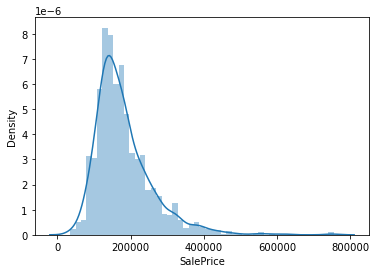

In [7]:
# Target variable is SalePrice
# verification of sale price
_=sb.distplot(house["SalePrice"])

In [8]:
# Categorical null verifications
total_null=house.isnull().sum().sort_values(ascending=False)
total_null

PoolQC           1453
MiscFeature      1406
Alley            1369
Fence            1179
FireplaceQu       690
                 ... 
CentralAir          0
SaleCondition       0
Heating             0
TotalBsmtSF         0
Id                  0
Length: 81, dtype: int64

In [9]:
per_null=house.isnull().sum()/house.shape[0]*100
per_null

Id                0.000000
MSSubClass        0.000000
MSZoning          0.000000
LotFrontage      17.739726
LotArea           0.000000
                   ...    
MoSold            0.000000
YrSold            0.000000
SaleType          0.000000
SaleCondition     0.000000
SalePrice         0.000000
Length: 81, dtype: float64

In [10]:
null_data=pd.concat([total_null,per_null], axis=1, keys=["total_null","per_null"])
null_data.head(25).sort_index()

,total_null,per_null
Alley,1369,93.767123
BsmtCond,37,2.534247
BsmtExposure,38,2.602740
BsmtFinType1,37,2.534247
BsmtFinType2,38,2.602740
BsmtQual,37,2.534247
Electrical,1,0.068493
ExterCond,0,0.000000
ExterQual,0,0.000000
Fence,1179,80.753425


In [11]:
# Choose na with meaning to process null values
meaning_null=["Alley","BsmtCond","BsmtExposure","BsmtFinType1","BsmtFinType2","BsmtQual",
              "Fence","FireplaceQu","GarageCond","GarageFinish","GarageQual","GarageType","PoolQC","MiscFeature"]

In [12]:
for i in meaning_null:
    house[i].fillna("None", inplace=True)

In [13]:
total_null=house.isnull().sum().sort_values(ascending=False)
per_null=house.isnull().sum()/house.shape[0]*100
null_data=pd.concat([total_null,per_null], axis=1, keys=["total_null","per_null"])
null_data.head(25)

,total_null,per_null
LotFrontage,259,17.739726
GarageYrBlt,81,5.547945
MasVnrType,8,0.547945
MasVnrArea,8,0.547945
Electrical,1,0.068493
SalePrice,0,0.000000
ExterCond,0,0.000000
RoofStyle,0,0.000000
RoofMatl,0,0.000000
Exterior1st,0,0.000000


In [14]:
house.drop("LotFrontage", axis=1, inplace=True)

In [15]:
total_null=house.isnull().sum().sort_values(ascending=False)
per_null=house.isnull().sum()/house.shape[0]*100
null_data=pd.concat([total_null,per_null], axis=1, keys=["total_null","per_null"])
null_data.head(10)

,total_null,per_null
GarageYrBlt,81,5.547945
MasVnrType,8,0.547945
MasVnrArea,8,0.547945
Electrical,1,0.068493
SalePrice,0,0.000000
Foundation,0,0.000000
RoofMatl,0,0.000000
Exterior1st,0,0.000000
Exterior2nd,0,0.000000
ExterQual,0,0.000000


In [16]:
house.dtypes.value_counts()

object     43
int64      35
float64     2
dtype: int64

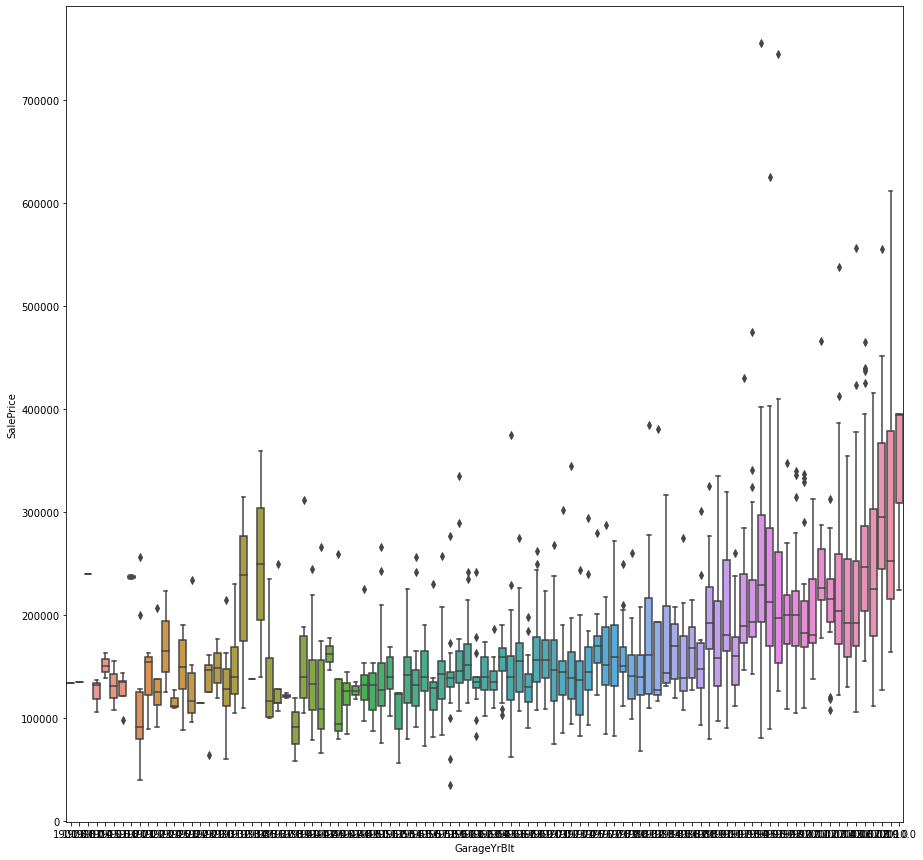

In [17]:
var="GarageYrBlt"
data=pd.concat([house["SalePrice"],house[var]], axis=1)
f,ax=plt.subplots(figsize=(15,15))
fig=sb.boxplot(x=var, y="SalePrice",data=data)

In [18]:
# Replace remaing null values with 
house["GarageYrBlt"].fillna(house["GarageYrBlt"].median(), inplace=True)
house["MasVnrArea"].fillna(house["MasVnrArea"].median(), inplace=True)
house["MasVnrType"].fillna("None", inplace=True)

In [19]:
total_null=house.isnull().sum().sort_values(ascending=False)
per_null=house.isnull().sum()/house.shape[0]*100
null_data=pd.concat([total_null,per_null], axis=1, keys=["total_null","per_null"])
null_data.head(10)

,total_null,per_null
Electrical,1,0.068493
SalePrice,0,0.000000
Foundation,0,0.000000
RoofMatl,0,0.000000
Exterior1st,0,0.000000
Exterior2nd,0,0.000000
MasVnrType,0,0.000000
MasVnrArea,0,0.000000
ExterQual,0,0.000000
ExterCond,0,0.000000


In [20]:
house.dropna(inplace=True)

In [21]:
total_null=house.isnull().sum().sort_values(ascending=False)
per_null=house.isnull().sum()/house.shape[0]*100
null_data=pd.concat([total_null,per_null], axis=1, keys=["total_null","per_null"])
null_data.head(10)

,total_null,per_null
SalePrice,0,0.0
SaleCondition,0,0.0
RoofMatl,0,0.0
Exterior1st,0,0.0
Exterior2nd,0,0.0
MasVnrType,0,0.0
MasVnrArea,0,0.0
ExterQual,0,0.0
ExterCond,0,0.0
Foundation,0,0.0


In [22]:
house.shape

(1459, 80)

In [23]:
house.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1459 entries, 0 to 1459
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1459 non-null   int64  
 1   MSSubClass     1459 non-null   int64  
 2   MSZoning       1459 non-null   object 
 3   LotArea        1459 non-null   int64  
 4   Street         1459 non-null   object 
 5   Alley          1459 non-null   object 
 6   LotShape       1459 non-null   object 
 7   LandContour    1459 non-null   object 
 8   Utilities      1459 non-null   object 
 9   LotConfig      1459 non-null   object 
 10  LandSlope      1459 non-null   object 
 11  Neighborhood   1459 non-null   object 
 12  Condition1     1459 non-null   object 
 13  Condition2     1459 non-null   object 
 14  BldgType       1459 non-null   object 
 15  HouseStyle     1459 non-null   object 
 16  OverallQual    1459 non-null   int64  
 17  OverallCond    1459 non-null   int64  
 18  YearBuil

In [24]:
house.dtypes.value_counts()

object     43
int64      35
float64     2
dtype: int64

In [25]:
types_train=house.dtypes
types_num=types_train[(types_train=="int64") | (types_train==float)]
types_num.value_counts()

int64      35
float64     2
dtype: int64

In [26]:
types_train=house.dtypes
types_str=types_train[(types_train=="object")]
types_str.value_counts()

object    43
dtype: int64

In [27]:
types_train.value_counts()

object     43
int64      35
float64     2
dtype: int64

In [28]:
pd.DataFrame(types_train)[0].value_counts()

object     43
int64      35
float64     2
Name: 0, dtype: int64

In [29]:
# Take numerical columns
Names_numerical=list(types_num.index)   # numerical columns
Names_numerical

['Id',
 'MSSubClass',
 'LotArea',
 'OverallQual',
 'OverallCond',
 'YearBuilt',
 'YearRemodAdd',
 'MasVnrArea',
 'BsmtFinSF1',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 '1stFlrSF',
 '2ndFlrSF',
 'LowQualFinSF',
 'GrLivArea',
 'BsmtFullBath',
 'BsmtHalfBath',
 'FullBath',
 'HalfBath',
 'BedroomAbvGr',
 'KitchenAbvGr',
 'TotRmsAbvGrd',
 'Fireplaces',
 'GarageYrBlt',
 'GarageCars',
 'GarageArea',
 'WoodDeckSF',
 'OpenPorchSF',
 'EnclosedPorch',
 '3SsnPorch',
 'ScreenPorch',
 'PoolArea',
 'MiscVal',
 'MoSold',
 'YrSold',
 'SalePrice']

In [30]:
Names_string=list(types_str.index)  # object catagorical columns
Names_string

['MSZoning',
 'Street',
 'Alley',
 'LotShape',
 'LandContour',
 'Utilities',
 'LotConfig',
 'LandSlope',
 'Neighborhood',
 'Condition1',
 'Condition2',
 'BldgType',
 'HouseStyle',
 'RoofStyle',
 'RoofMatl',
 'Exterior1st',
 'Exterior2nd',
 'MasVnrType',
 'ExterQual',
 'ExterCond',
 'Foundation',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'Heating',
 'HeatingQC',
 'CentralAir',
 'Electrical',
 'KitchenQual',
 'Functional',
 'FireplaceQu',
 'GarageType',
 'GarageFinish',
 'GarageQual',
 'GarageCond',
 'PavedDrive',
 'PoolQC',
 'Fence',
 'MiscFeature',
 'SaleType',
 'SaleCondition']

C:\Users\Veera Bhadra Chary\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='SalePrice', ylabel='Density'>

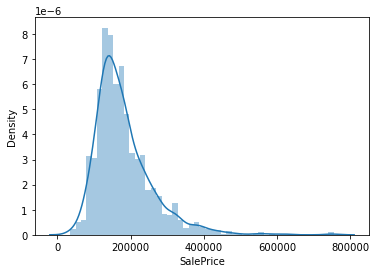

In [31]:
sb.distplot(house[ 'SalePrice'])

C:\Users\Veera Bhadra Chary\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='SalePrice', ylabel='Density'>

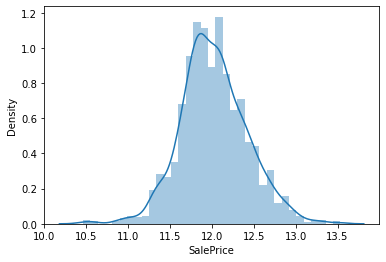

In [32]:
sb.distplot(np.log(house[ 'SalePrice']))

In [33]:
house["Trans_sprice"]=np.log(house['SalePrice'])

In [34]:
house.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotArea', 'Street', 'Alley',
       'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope',
       'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle',
       'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle',
       'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea',
       'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC',
       'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd',
       'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType', 'GarageYrBlt',
       'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond',
       'PavedDrive', 'WoodDeckSF'

In [35]:
Names_string

['MSZoning',
 'Street',
 'Alley',
 'LotShape',
 'LandContour',
 'Utilities',
 'LotConfig',
 'LandSlope',
 'Neighborhood',
 'Condition1',
 'Condition2',
 'BldgType',
 'HouseStyle',
 'RoofStyle',
 'RoofMatl',
 'Exterior1st',
 'Exterior2nd',
 'MasVnrType',
 'ExterQual',
 'ExterCond',
 'Foundation',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'Heating',
 'HeatingQC',
 'CentralAir',
 'Electrical',
 'KitchenQual',
 'Functional',
 'FireplaceQu',
 'GarageType',
 'GarageFinish',
 'GarageQual',
 'GarageCond',
 'PavedDrive',
 'PoolQC',
 'Fence',
 'MiscFeature',
 'SaleType',
 'SaleCondition']

In [36]:
# change categorical strings in to numbers
house["MSZoning"].value_counts()

RL         1150
RM          218
FV           65
RH           16
C (all)      10
Name: MSZoning, dtype: int64

In [37]:
house[Names_string]

,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,...,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
0,RL,Pave,None,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,...,Attchd,RFn,TA,TA,Y,None,None,None,WD,Normal
1,RL,Pave,None,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,...,Attchd,RFn,TA,TA,Y,None,None,None,WD,Normal
2,RL,Pave,None,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,...,Attchd,RFn,TA,TA,Y,None,None,None,WD,Normal
3,RL,Pave,None,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,...,Detchd,Unf,TA,TA,Y,None,None,None,WD,Abnorml
4,RL,Pave,None,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,...,Attchd,RFn,TA,TA,Y,None,None,None,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,RL,Pave,None,Reg,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,...,Attchd,RFn,TA,TA,Y,None,None,None,WD,Normal
1456,RL,Pave,None,Reg,Lvl,AllPub,Inside,Gtl,NWAmes,Norm,...,Attchd,Unf,TA,TA,Y,None,MnPrv,None,WD,Normal
1457,RL,Pave,None,Reg,Lvl,AllPub,Inside,Gtl,Crawfor,Norm,...,Attchd,RFn,TA,TA,Y,None,GdPrv,Shed,WD,Normal
1458,RL,Pave,None,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,...,Attchd,Unf,TA,TA,Y,None,None,None,WD,Normal


In [38]:
# convert all ategorical columns into catageriwise
for i in Names_string:
    feature_set=set(house[i])
    for j in feature_set:
        feature_list=list(feature_set)
        house.loc[house[i]==j,i]=feature_list.index(j)

In [39]:
house.head()

,Id,MSSubClass,MSZoning,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,Trans_sprice
0,1,60,1,8450,1,0,1,0,0,0,...,0,1,2,0,2,2008,0,2,208500,12.247694
1,2,20,1,9600,1,0,1,0,0,1,...,0,1,2,0,5,2007,0,2,181500,12.109011
2,3,60,1,11250,1,0,0,0,0,0,...,0,1,2,0,9,2008,0,2,223500,12.317167
3,4,70,1,9550,1,0,0,0,0,4,...,0,1,2,0,2,2006,0,1,140000,11.849398
4,5,60,1,14260,1,0,0,0,0,1,...,0,1,2,0,12,2008,0,2,250000,12.429216


In [40]:
x=house.drop(["Id","SalePrice","Trans_sprice"],axis=1)

In [41]:
x

,MSSubClass,MSZoning,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,60,1,8450,1,0,1,0,0,0,2,...,0,0,0,1,2,0,2,2008,0,2
1,20,1,9600,1,0,1,0,0,1,2,...,0,0,0,1,2,0,5,2007,0,2
2,60,1,11250,1,0,0,0,0,0,2,...,0,0,0,1,2,0,9,2008,0,2
3,70,1,9550,1,0,0,0,0,4,2,...,0,0,0,1,2,0,2,2006,0,1
4,60,1,14260,1,0,0,0,0,1,2,...,0,0,0,1,2,0,12,2008,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,60,1,7917,1,0,1,0,0,0,2,...,0,0,0,1,2,0,8,2007,0,2
1456,20,1,13175,1,0,1,0,0,0,2,...,0,0,0,3,2,0,2,2010,0,2
1457,70,1,9042,1,0,1,0,0,0,2,...,0,0,0,4,0,2500,5,2010,0,2
1458,20,1,9717,1,0,1,0,0,0,2,...,0,0,0,1,2,0,4,2010,0,2


In [42]:
y=house["Trans_sprice"]
y.head(10)

0    12.247694
1    12.109011
2    12.317167
3    11.849398
4    12.429216
5    11.870600
6    12.634603
7    12.206073
8    11.774520
9    11.678440
Name: Trans_sprice, dtype: float64

# Modeling Regularize regression.

In [43]:
from sklearn.model_selection import train_test_split

In [44]:
x_train, x_test, y_train, y_test=train_test_split(x,y, test_size=0.3,random_state=100)

In [45]:
params={"alpha":[0.0001,0.001,0.01,0.05,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0,2,3,4,5,6,7,8,9,10,20,50,100,500,1000]}

In [46]:
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV

In [47]:
lasso=Lasso()
folds=5
model_cv=GridSearchCV(estimator=lasso, param_grid=params,scoring="neg_mean_absolute_error", return_train_score=True,cv=folds, verbose=1)
model_cv.fit(x_train,y_train)

Fitting 5 folds for each of 28 candidates, totalling 140 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 140 out of 140 | elapsed:    3.9s finished


GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2, 3, 4,
                                   5, 6, 7, 8, 9, 10, 20, 50, 100, 500, 1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [48]:
Results_cv=pd.DataFrame(model_cv.cv_results_)
Results_cv

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.037747,1.315757e-02,0.004802,0.000399,0.0001,{'alpha': 0.0001},-0.083806,-0.096874,-0.100860,-0.099434,...,-0.095073,0.006052,1,-0.085268,-0.081375,-0.074691,-0.083479,-0.081508,-0.081264,0.003583
1,0.024611,6.058599e-03,0.006003,0.002002,0.001,{'alpha': 0.001},-0.089979,-0.100694,-0.101065,-0.098433,...,-0.096516,0.004504,2,-0.089689,-0.084236,-0.077785,-0.083833,-0.085259,-0.084160,0.003809
2,0.014005,1.999831e-03,0.002999,0.004000,0.01,{'alpha': 0.01},-0.097882,-0.102376,-0.104327,-0.098285,...,-0.098637,0.004823,3,-0.094651,-0.093033,-0.088301,-0.087085,-0.093596,-0.091333,0.003042
3,0.026002,3.742878e-03,0.003001,0.002451,0.05,{'alpha': 0.05},-0.100770,-0.115857,-0.118473,-0.119208,...,-0.110945,0.008526,4,-0.107455,-0.105609,-0.101471,-0.102760,-0.106657,-0.104790,0.002298
4,0.027088,5.226892e-03,0.003803,0.001940,0.1,{'alpha': 0.1},-0.104583,-0.124064,-0.126518,-0.124378,...,-0.117586,0.009182,8,-0.116685,-0.112355,-0.107958,-0.107096,-0.115256,-0.111870,0.003821
5,0.025005,8.368162e-03,0.005209,0.002848,0.2,{'alpha': 0.2},-0.103537,-0.123150,-0.127092,-0.123365,...,-0.117135,0.009307,6,-0.116331,-0.112015,-0.108082,-0.107171,-0.115530,-0.111826,0.003735
6,0.022003,6.783118e-03,0.005001,0.000002,0.3,{'alpha': 0.3},-0.103387,-0.122389,-0.127573,-0.122634,...,-0.117010,0.009174,5,-0.116293,-0.112074,-0.108361,-0.107311,-0.115678,-0.111944,0.003665
7,0.020002,5.478178e-03,0.004002,0.002001,0.4,{'alpha': 0.4},-0.104123,-0.121647,-0.128279,-0.122023,...,-0.117196,0.008832,7,-0.116799,-0.112551,-0.108901,-0.107715,-0.116152,-0.112424,0.003678
8,0.021003,7.350228e-03,0.004001,0.002000,0.5,{'alpha': 0.5},-0.105308,-0.121368,-0.129174,-0.122390,...,-0.117808,0.008581,9,-0.117510,-0.113637,-0.109603,-0.108516,-0.116820,-0.113217,0.003654
9,0.018002,4.000831e-03,0.004001,0.002001,0.6,{'alpha': 0.6},-0.106789,-0.121644,-0.130228,-0.123564,...,-0.118756,0.008464,10,-0.118611,-0.114859,-0.110428,-0.109771,-0.117489,-0.114231,0.003593


In [49]:
 Results_cv.columns

Index(['mean_fit_time', 'std_fit_time', 'mean_score_time', 'std_score_time',
       'param_alpha', 'params', 'split0_test_score', 'split1_test_score',
       'split2_test_score', 'split3_test_score', 'split4_test_score',
       'mean_test_score', 'std_test_score', 'rank_test_score',
       'split0_train_score', 'split1_train_score', 'split2_train_score',
       'split3_train_score', 'split4_train_score', 'mean_train_score',
       'std_train_score'],
      dtype='object')

In [50]:
Results_cv.dtypes

mean_fit_time         float64
std_fit_time          float64
mean_score_time       float64
std_score_time        float64
param_alpha            object
params                 object
split0_test_score     float64
split1_test_score     float64
split2_test_score     float64
split3_test_score     float64
split4_test_score     float64
mean_test_score       float64
std_test_score        float64
rank_test_score         int32
split0_train_score    float64
split1_train_score    float64
split2_train_score    float64
split3_train_score    float64
split4_train_score    float64
mean_train_score      float64
std_train_score       float64
dtype: object

In [51]:
Results_cv["param_alpha"]=Results_cv["param_alpha"].astype("float32")

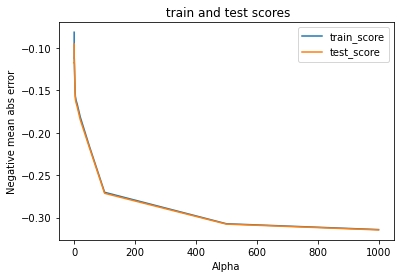

In [55]:
plt.plot(Results_cv["param_alpha"],Results_cv["mean_train_score"])
plt.plot(Results_cv["param_alpha"],Results_cv["mean_test_score"])
plt.xlabel("Alpha")
plt.ylabel("Negative mean abs error")
plt.legend(["train_score","test_score"])
plt.title(" train and test scores")
plt.show()

In [57]:
alpha=50
lasso=Lasso(alpha=alpha)
lasso.fit(x_train,y_train)

Lasso(alpha=50)

In [58]:
lasso.coef_

array([-0.00000000e+00, -0.00000000e+00,  4.02426915e-06,  0.00000000e+00,
       -0.00000000e+00, -0.00000000e+00, -0.00000000e+00, -0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00, -0.00000000e+00,
       -0.00000000e+00, -0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
       -0.00000000e+00, -0.00000000e+00, -0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00, -0.00000000e+00, -0.00000000e+00,
        0.00000000e+00, -0.00000000e+00, -0.00000000e+00, -0.00000000e+00,
        0.00000000e+00,  0.00000000e+00, -0.00000000e+00,  0.00000000e+00,
        1.41724335e-04, -0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
       -0.00000000e+00,  0.00000000e+00,  0.00000000e+00, -0.00000000e+00,
        2.68173575e-04,  0.00000000e+00, -0.00000000e+00,  0.00000000e+00,
        0.00000000e+00, -0.00000000e+00, -0.00000000e+00,  0.00000000e+00,
        0.00000000e+00, -

# Redge regression

In [59]:
ridge=Ridge()
folds=5
model_cv=GridSearchCV(estimator=ridge, param_grid=params,scoring="neg_mean_absolute_error", return_train_score=True,cv=folds, verbose=1)
model_cv.fit(x_train,y_train)

Fitting 5 folds for each of 28 candidates, totalling 140 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 140 out of 140 | elapsed:    3.1s finished


GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2, 3, 4,
                                   5, 6, 7, 8, 9, 10, 20, 50, 100, 500, 1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [60]:
Results_cv=pd.DataFrame(model_cv.cv_results_)
Results_cv

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.079010,0.138069,0.006000,0.001998,0.0001,{'alpha': 0.0001},-0.084665,-0.096460,-0.101051,-0.095863,...,-0.094575,0.005393,1,-0.084965,-0.081156,-0.074446,-0.083350,-0.081359,-0.081055,0.003587
1,0.008997,0.003747,0.003004,0.002452,0.001,{'alpha': 0.001},-0.084646,-0.096469,-0.101058,-0.096171,...,-0.094636,0.005418,2,-0.084972,-0.081162,-0.074448,-0.083358,-0.081364,-0.081061,0.003589
2,0.010994,0.001994,0.002004,0.002454,0.01,{'alpha': 0.01},-0.084464,-0.096556,-0.101123,-0.097743,...,-0.094944,0.005630,3,-0.085041,-0.081214,-0.074473,-0.083400,-0.081409,-0.081107,0.003601
3,0.011007,0.003747,0.002001,0.002450,0.05,{'alpha': 0.05},-0.083762,-0.096920,-0.101425,-0.099035,...,-0.095192,0.006122,4,-0.085360,-0.081438,-0.074591,-0.083441,-0.081613,-0.081289,0.003639
4,0.008999,0.001998,0.002998,0.002448,0.1,{'alpha': 0.1},-0.083067,-0.097327,-0.101770,-0.099320,...,-0.095257,0.006512,5,-0.085714,-0.081718,-0.074769,-0.083458,-0.081940,-0.081520,0.003664
5,0.009001,0.002000,0.004004,0.002002,0.2,{'alpha': 0.2},-0.083937,-0.098019,-0.102406,-0.099470,...,-0.095729,0.006383,6,-0.086344,-0.082256,-0.075382,-0.083479,-0.082647,-0.082022,0.003615
6,0.011003,0.002010,0.002001,0.002450,0.3,{'alpha': 0.3},-0.084962,-0.098623,-0.103042,-0.099518,...,-0.096213,0.006191,7,-0.086929,-0.082774,-0.075977,-0.083495,-0.083283,-0.082492,0.003573
7,0.009005,0.003742,0.004006,0.002003,0.4,{'alpha': 0.4},-0.085773,-0.099240,-0.103640,-0.099536,...,-0.096643,0.006080,8,-0.087408,-0.083220,-0.076512,-0.083509,-0.083856,-0.082901,0.003536
8,0.010006,0.000015,0.005003,0.000003,0.5,{'alpha': 0.5},-0.086459,-0.099787,-0.104141,-0.099544,...,-0.097010,0.005998,9,-0.087811,-0.083609,-0.076977,-0.083521,-0.084360,-0.083256,0.003510
9,0.008995,0.001997,0.005002,0.000003,0.6,{'alpha': 0.6},-0.087029,-0.100253,-0.104578,-0.099546,...,-0.097331,0.005940,10,-0.088144,-0.083945,-0.077390,-0.083531,-0.084793,-0.083561,0.003486


In [61]:
Results_cv.columns

Index(['mean_fit_time', 'std_fit_time', 'mean_score_time', 'std_score_time',
       'param_alpha', 'params', 'split0_test_score', 'split1_test_score',
       'split2_test_score', 'split3_test_score', 'split4_test_score',
       'mean_test_score', 'std_test_score', 'rank_test_score',
       'split0_train_score', 'split1_train_score', 'split2_train_score',
       'split3_train_score', 'split4_train_score', 'mean_train_score',
       'std_train_score'],
      dtype='object')

In [62]:
Results_cv.dtypes

mean_fit_time         float64
std_fit_time          float64
mean_score_time       float64
std_score_time        float64
param_alpha            object
params                 object
split0_test_score     float64
split1_test_score     float64
split2_test_score     float64
split3_test_score     float64
split4_test_score     float64
mean_test_score       float64
std_test_score        float64
rank_test_score         int32
split0_train_score    float64
split1_train_score    float64
split2_train_score    float64
split3_train_score    float64
split4_train_score    float64
mean_train_score      float64
std_train_score       float64
dtype: object

In [63]:
Results_cv["param_alpha"]=Results_cv["param_alpha"].astype("float32")

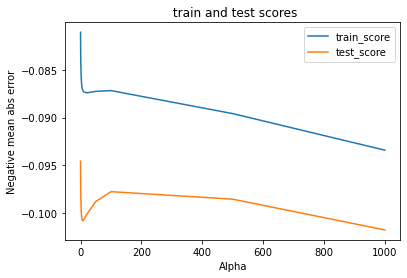

In [64]:
plt.plot(Results_cv["param_alpha"],Results_cv["mean_train_score"])
plt.plot(Results_cv["param_alpha"],Results_cv["mean_test_score"])
plt.xlabel("Alpha")
plt.ylabel("Negative mean abs error")
plt.legend(["train_score","test_score"])
plt.title(" train and test scores")
plt.show()

In [65]:
alpha=10 # close to zero
ridge=Ridge(alpha=alpha)
ridge.fit(x_train,y_train)

Ridge(alpha=10)

In [66]:
ridge.coef_

array([ 7.03443261e-05, -8.35983854e-05,  1.79598899e-06,  6.14887419e-02,
       -7.80938273e-03, -1.29764207e-02, -1.84140434e-02, -1.68396530e-02,
        3.07809953e-03, -2.28161371e-02,  1.28559290e-04, -2.36248409e-02,
       -5.99024610e-02, -2.78068114e-02,  4.34642523e-03,  7.03644536e-02,
        4.41201319e-02,  2.06642758e-03,  7.75464568e-04,  9.35928403e-03,
       -3.06128870e-02, -2.58283249e-04,  1.36582844e-03, -1.94990500e-03,
        1.98212562e-05,  1.16004969e-02, -1.00263611e-02, -2.62672257e-02,
        1.01790403e-02, -5.82588989e-03, -3.76582891e-03, -2.43562949e-03,
        3.49561423e-05, -1.36728977e-03,  7.31486073e-06, -6.44882434e-07,
        4.16261167e-05,  4.57901201e-03,  1.10996611e-02,  6.74948241e-02,
        2.27885154e-03,  5.83807652e-05,  2.06654198e-05,  9.19128811e-05,
        1.70959066e-04,  6.12196919e-02,  2.19889157e-02,  3.08774692e-02,
        1.68001685e-02,  4.09697553e-03, -2.69945242e-02,  1.42818796e-02,
        8.16620457e-03, -